In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

from scipy.optimize import least_squares, curve_fit

%matplotlib inline

workdir = '/mnt/e/GitHub_Design/DesignScript/BindingKd/vel_nir_mef_Kd_UV_raw_data/'

data = pd.read_csv(workdir + '20230517_vel15uM_titri.csv')  #data from UV-vis-300
# for name in data.columns[2:]:
#     x = data[name][250:350]  - data[data.columns[1]][250:350]
#     y = sum(x)/len(x)
#     data[name] = data[name] - y

abs_15uM = []
abs_15uM.append(data.iloc[312-250, 2])
for i in range(int(len(data.iloc[312-250, 3:])/3)):
    x = data.iloc[312-250, 3+i*3:3+i*3+3]
    #print(x)
    abs_15uM.append(sum(x)/3)

abs_15uM_a = [data.iloc[312-250, 2]]
abs_15uM_a.extend(data.iloc[312-250, 3::3].tolist())
abs_15uM_b = [data.iloc[312-250, 2]]
abs_15uM_b.extend(data.iloc[312-250, 3+1::3].tolist())
abs_15uM_c = [data.iloc[312-250, 2]]
abs_15uM_c.extend(data.iloc[312-250, 3+2::3].tolist())
print(data.iloc[312-250, 0])
print(len(abs_15uM))
print(abs_15uM_a)

data = pd.read_csv(workdir + '20230517_vel20uM_titri.csv')  #data from UV-vis-300
# for name in data.columns[2:]:
#     x = data[name][250:350]  - data[data.columns[1]][250:350]
#     y = sum(x)/len(x)
#     data[name] = data[name] - y
abs_20uM = []
abs_20uM.append(data.iloc[312-250, 2])
for i in range(int(len(data.iloc[312-250, 3:])/3)):
    x = data.iloc[312-250, 3+i*3:3+i*3+3]
    #print(x)
    abs_20uM.append(sum(x)/3)

abs_20uM_a = [data.iloc[312-250, 2]]
abs_20uM_a.extend(data.iloc[312-250, 3::3].tolist())
abs_20uM_b = [data.iloc[312-250, 2]]
abs_20uM_b.extend(data.iloc[312-250, 3+1::3].tolist())
abs_20uM_c = [data.iloc[312-250, 2]]
abs_20uM_c.extend(data.iloc[312-250, 3+2::3].tolist())
print(data.iloc[312-250, 0])
print(len(abs_20uM))
print(abs_20uM_a)
print(len(abs_20uM_a))

data = pd.read_csv(workdir + '20230516_vel30uM_titri.csv')  #data from UV-vis-300
# for name in data.columns[2:]:
#     x = data[name][250:350]  - data[data.columns[1]][250:350]
#     y = sum(x)/len(x)
#     data[name] = data[name] - y
abs_30uM = []
abs_30uM.append(data.iloc[312-250, 2])
for i in range(int(len(data.iloc[312-250, 3:])/3)):
    x = data.iloc[312-250, 3+i*3:3+i*3+3]
    #print(x)
    abs_30uM.append(sum(x)/3)

abs_30uM_a = [data.iloc[312-250, 2]]
abs_30uM_a.extend(data.iloc[312-250, 3::3].tolist())
abs_30uM_b = [data.iloc[312-250, 2]]
abs_30uM_b.extend(data.iloc[312-250, 3+1::3].tolist())
abs_30uM_c = [data.iloc[312-250, 2]]
abs_30uM_c.extend(data.iloc[312-250, 3+2::3].tolist())
print(data.iloc[312-250, 0])
print(len(abs_30uM))
print(abs_30uM_a)




312
21
[0.002893991, 0.009047654, 0.017187692, 0.021975219, 0.030450493, 0.036709882, 0.0441349, 0.054186538, 0.061446086, 0.072167352, 0.07803449, 0.090459511, 0.105297878, 0.119939424, 0.133352056, 0.148277745, 0.176922709, 0.205513477, 0.234783188, 0.267859459, 0.297665298]
312
21
[0.004673922, 0.012719105, 0.021348631, 0.029410787, 0.039560504, 0.051033515, 0.059684426, 0.068145789, 0.077711321, 0.090629436, 0.100853495, 0.121224396, 0.143659875, 0.165398568, 0.185870573, 0.209092811, 0.254677564, 0.298260659, 0.342264742, 0.383400112, 0.430059493]
21
312
19
[0.003994293, 0.016694086, 0.027868466, 0.043789428, 0.0578463, 0.07584253, 0.093432724, 0.11033272, 0.12949498, 0.146918744, 0.166145012, 0.199686617, 0.236901298, 0.276226431, 0.316208929, 0.353002399, 0.404999495, 0.474625289, 0.550889373]


(-0.05, 1.0)

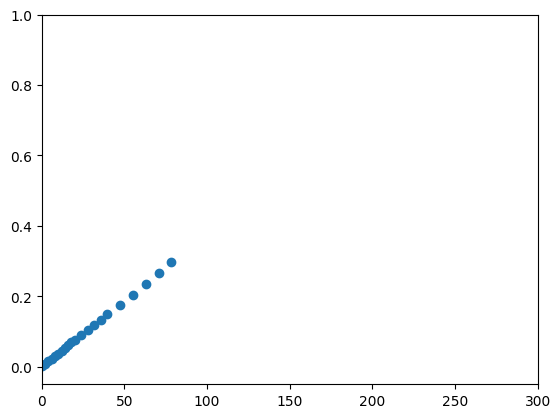

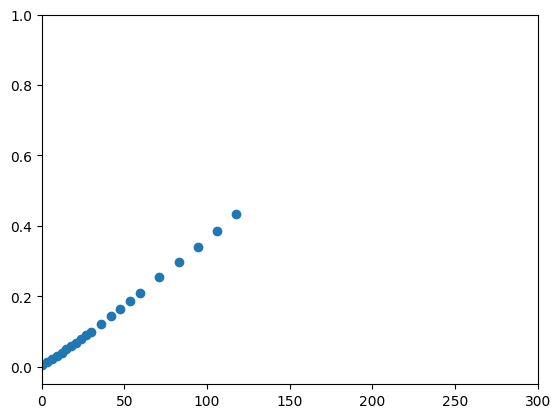

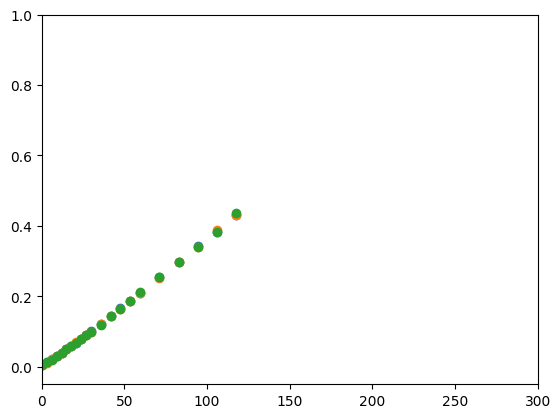

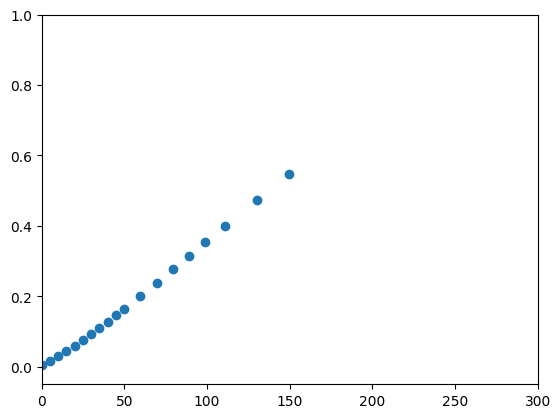

In [2]:
adds_15uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40]
conc_15uM = [4000*x/(2000+x) for x in adds_15uM]
prot_conc_15uM = [2000*15/(2000+x) for x in adds_15uM]

fig,ax = plt.subplots()
ax.scatter(conc_15uM, abs_15uM)
plt.xlim([0, 300])
plt.ylim([-0.05, 1])


adds_20uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40]
conc_20uM = [6000*x/(2000+x) for x in adds_20uM]
prot_conc_20uM = [2000*20/(2000+x) for x in adds_20uM]

fig,ax = plt.subplots()
ax.scatter(conc_20uM, abs_20uM)
plt.xlim([0, 300])
plt.ylim([-0.05, 1])

fig,ax = plt.subplots()
ax.scatter(conc_20uM, abs_20uM_a)
ax.scatter(conc_20uM, abs_20uM_b)
ax.scatter(conc_20uM, abs_20uM_c)
plt.xlim([0, 300])
plt.ylim([-0.05, 1])


adds_30uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22.4, 26.4, 30.4]
conc_30uM = [10000*x/(2000+x) for x in adds_30uM]
prot_conc_30uM = [2000*30/(2000+x) for x in adds_30uM]

fig,ax = plt.subplots()
ax.scatter(conc_30uM, abs_30uM)
plt.xlim([0, 300])
plt.ylim([-0.05, 1])


In [3]:
def pl_stoich(Pt, Lt, Kd, n):
    return 1/2*(Kd + Lt + Pt/n - np.sqrt((Kd + Lt + Pt/n)**2 - 4*Lt*Pt/n))

def res_float_nir(x):
    rs = []
    #rs.extend(abs_15uM[i] - abs_15uM[0] - x[3]*conc_15uM[i] - x[0]*pl_stoich(15*2000/(2000+ adds_15uM[i]), conc_15uM[i], x[1], x[2]) for i in range(len(conc_15uM)) )
    rs.extend(abs_20uM[i] - abs_20uM[0] - x[3]*conc_20uM[i] - x[0]*pl_stoich(20*2000/(2000+ adds_20uM[i]), conc_20uM[i], x[1], x[2]) for i in range(len(conc_20uM)) )
    rs.extend(abs_30uM[i] - abs_30uM[0] - x[4]*conc_30uM[i] - x[0]*pl_stoich(30*2000/(2000+ adds_30uM[i]), conc_30uM[i], x[1], x[2]) for i in range(len(conc_30uM)) )
    return rs


In [6]:
#res_nir = least_squares(res_float_nir, np.array([.002, 1, 1, .007,.007,.007]), bounds=[(0.0001,.1,.5, .0001,.0001,.0001), (.01,50,3, .1,.1,.1)])
#res_nir = least_squares(res_float_nir, np.array([.002, 1, 1, .007,.007,.007]))
res_nir = least_squares(res_float_nir, np.array([.002, 1, 1, .007,.007]), bounds=[(-10000, .1, .9, .00001,.00001,), (.01,50,1.1, .1,.1)])

x = res_nir.x  # fit parameters
x_orig = x

print('Fit of full data from Science paper:')
print(
      'delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)=', x_orig[0],
      '\nKd (uM)=', x_orig[1],
      '\nN(stoichiometry)=', x_orig[2],
      '\nEpsilon of Apx @ 305 nm and c=5 uM (M^-1 cm^-1)=', x_orig[3],
      '\nEpsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)=', x_orig[4],
      #'\nEpsilon of Apx @ 305 nm and c=20uM (M^-1 cm^-1)=', x_orig[5],
      )

#How to compute standard deviation errors.
#https://stackoverflow.com/questions/42388139/how-to-compute-standard-deviation-errors-with-scipy-optimize-least-squares
print(res_nir.x)

# J = res_nir.jac
# cov = np.linalg.inv(J.T.dot(J))
# var = np.sqrt(np.diagonal(cov))
# print(var)

# import scipy.linalg as linalg
# U, s, Vh = linalg.svd(res_nir.jac, full_matrices=False)
# tol = np.finfo(float).eps*s[0]*max(res_nir.jac.shape)
# w = s > tol
# cov = (Vh[w].T/s[w]**2) @ Vh[w]  # robust covariance matrix
# cov = linalg.inv(res_nir.jac.T @ res_nir.jac)  
# perr = np.sqrt(np.diag(cov))  
# print(perr)

# chi2dof = np.sum(res_nir.fun**2)/(res_nir.fun.size - res_nir.x.size)
# cov *= chi2dof
# perr = np.sqrt(np.diag(cov)) 
# print(perr)

Fit of full data from Science paper:
delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)= -0.0014807311923113733 
Kd (uM)= 5.090340704781822 
N(stoichiometry)= 1.0999999999999912 
Epsilon of Apx @ 305 nm and c=5 uM (M^-1 cm^-1)= 0.00383828857797715 
Epsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)= 0.003898202105112244
[-1.48073119e-03  5.09034070e+00  1.10000000e+00  3.83828858e-03
  3.89820211e-03]


([<matplotlib.axis.XTick at 0x7f4373ccf190>,
 <a list of 9 Text major ticklabel objects>)

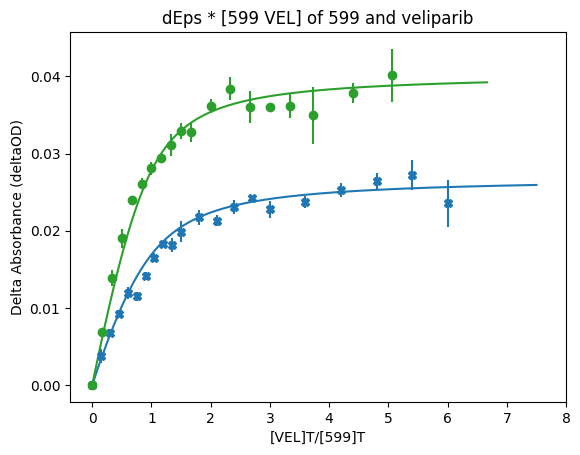

In [7]:


#dePL_15 = [-(abs_15uM[i] - abs_15uM[0] - x[3] * conc_15uM[i]) for i in range(len(conc_15uM))]
dePL_20 = [-(abs_20uM[i] - abs_20uM[0] - x[3] * conc_20uM[i]) for i in range(len(conc_20uM))]
dePL_30 = [-(abs_30uM[i] - abs_30uM[0] - x[4] * conc_30uM[i]) for i in range(len(conc_30uM))]

dePL_20_a = [-(abs_20uM_a[i] - abs_20uM_a[0] - x[3] * conc_20uM[i]) for i in range(len(conc_20uM))]
dePL_20_b = [-(abs_20uM_b[i] - abs_20uM_b[0] - x[3] * conc_20uM[i]) for i in range(len(conc_20uM))]
dePL_20_c = [-(abs_20uM_c[i] - abs_20uM_c[0] - x[3] * conc_20uM[i]) for i in range(len(conc_20uM))]
dePL_20_std = [statistics.stdev([dePL_20_a[i], dePL_20_b[i], dePL_20_c[i]]) for i in range(len(conc_20uM))]

dePL_30_a = [-(abs_30uM_a[i] - abs_30uM_a[0] - x[4] * conc_30uM[i]) for i in range(len(conc_30uM))]
dePL_30_b = [-(abs_30uM_b[i] - abs_30uM_b[0] - x[4] * conc_30uM[i]) for i in range(len(conc_30uM))]
dePL_30_c = [-(abs_30uM_c[i] - abs_30uM_c[0] - x[4] * conc_30uM[i]) for i in range(len(conc_30uM))]
dePL_30_std = [statistics.stdev([dePL_30_a[i], dePL_30_b[i], dePL_30_c[i]]) for i in range(len(conc_30uM))]

plt.figure()
#plt.plot([4000*add/(15*2000) for add in adds_15uM], dePL_15, 's', label='[ABLER]T = 15 uM', color='tab:orange')
#plt.plot([6000*add/(20*2000) for add in adds_20uM], dePL_20, 'X', label='[ABLER]T = 20 uM', color='tab:blue')
#plt.plot([10000*add/(30*2000) for add in adds_30uM], dePL_30, 'o', label='[ABLER]T = 30 uM', color='tab:green' )

ratio_20 = [6000*add/(2000*20) for add in adds_20uM]
ratio_30 = [10000*add/(2000*30) for add in adds_30uM]
plt.errorbar([6000*add/(2000*20) for add in adds_20uM], dePL_20, yerr= dePL_20_std, fmt='X', label='[ABLER]T = 20 uM', color='tab:blue')
plt.errorbar([10000*add/(2000*30) for add in adds_30uM], dePL_30, yerr= dePL_30_std, fmt='o', label='[ABLER]T = 30 uM', color='tab:green')

#fit_dePL_15 = [-x[0] * pl_stoich(15, np.linspace(0,100,200)[i], x[1], x[2]) for i in range(200)]
fit_dePL_20 = [-x[0] * pl_stoich(20, np.linspace(0,150,250)[i], x[1], x[2]) for i in range(250)]
fit_dePL_30 = [-x[0] * pl_stoich(30, np.linspace(0,200,300)[i], x[1], x[2]) for i in range(300)]

fit_20x = [c/20 for c in np.linspace(0,150,250)]
fit_30x = [c/30 for c in np.linspace(0,200,300)]
#plt.plot([c/15 for c in np.linspace(0,100,200)], fit_dePL_15, color='tab:orange')
plt.plot(fit_20x, fit_dePL_20, color='tab:blue')
plt.plot(fit_30x, fit_dePL_30, color='tab:green')

plt.xlabel('[VEL]T/[599]T')
plt.ylabel('Delta Absorbance (deltaOD)')
plt.title('dEps * [599 VEL] of 599 and veliparib')
plt.xticks(list(range(9)))

In [27]:
#write data files for GraphPad.
import os
outdir = workdir + 'processed_data/'
os.makedirs(outdir, exist_ok=True)
with open(outdir + 'vel_processed.tsv', 'w') as f:
    f.write('ratio20\t')
    f.write('\t'.join([str(round(x, 6)) for x in ratio_20]) + '\n')
    f.write('delta20\t')
    f.write('\t'.join([str(round(x, 6)) for x in dePL_20]) + '\n')
    f.write('std20\t')
    f.write('\t'.join([str(round(x, 6)) for x in dePL_20_std]) + '\n')

    f.write('ratio30\t')
    f.write('\t'.join([str(round(x, 6)) for x in ratio_30]) + '\n')
    f.write('delta30\t')
    f.write('\t'.join([str(round(x, 6)) for x in dePL_30]) + '\n')
    f.write('std30\t')
    f.write('\t'.join([str(round(x, 6)) for x in dePL_30_std]) + '\n')

    f.write('fit_20_x\t')
    f.write('\t'.join([str(round(x, 6)) for x in fit_20x]) + '\n')
    f.write('fit_30_y\t')
    f.write('\t'.join([str(round(x, 6)) for x in fit_dePL_20]) + '\n')

    f.write('fit_30_x\t')
    f.write('\t'.join([str(round(x, 6)) for x in fit_30x]) + '\n')
    f.write('fit_30_y\t')
    f.write('\t'.join([str(round(x, 6)) for x in fit_dePL_30]) + '\n')



